In [1]:
#importing some libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

pd.set_option('display.max_columns',None)

# Data Exploration

## Column Describtion 

### All Ts represents Temperature, and RHs repersents Humidity

- <b> Appliances, energy use in Wh </b> 
- date time year-month-day hour:minute:second 
- lights, energy use of light fixtures in the house in Wh 
- T1, Temperature in kitchen area, in Celsius 
- RH_1, Humidity in kitchen area, in % 
- T2, Temperature in living room area, in Celsius 
- RH_2, Humidity in living room area, in % 
- T3, Temperature in laundry room area
- RH_3, Humidity in laundry room area, in % 
- T4, Temperature in office room, in Celsius 
- RH_4, Humidity in office room, in % 
- T5, Temperature in bathroom, in Celsius 
- RH_5, Humidity in bathroom, in % 
- T6, Temperature outside the building (north side), in Celsius 
- RH_6, Humidity outside the building (north side), in % 
- T7, Temperature in ironing room , in Celsius 
- RH_7, Humidity in ironing room, in % 
- T8, Temperature in teenager room 2, in Celsius 
- RH_8, Humidity in teenager room 2, in % 
- T9, Temperature in parents room, in Celsius 
- RH_9, Humidity in parents room, in % 
- To, Temperature outside (from Chievres weather station), in Celsius 
- Pressure (from Chievres weather station), in mm Hg 
- RH_out, Humidity outside (from Chievres weather station), in % 
- Wind speed (from Chievres weather station), in m/s 
- Visibility (from Chievres weather station), in km 
- Tdewpoint (from Chievres weather station), Â°C 
- rv1, Random variable 1, nondimensional 
- rv2, Random variable 2, nondimensional

In [2]:
data = pd.read_csv('energydata.csv')

#Removing Random Variables
data = data.drop('rv1',axis=1)
data = data.drop('rv2',axis=1)

data.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4       RH_4         T5   RH_5        T6  \
0  19.79  44.730000  19.000000  45.566667  17.166667  55.20  7.026667   
1  19.79  44.790000  19.000000  45.992500  17.166667  55.20  6.833333   
2  19.79  44.933333  18.926667  45.890000  17.166667  55.09  6.560000   
3  19.79  45.000000  18.890000  45.723333  17.166667  55.09  6.433333   
4  19.79  45.000000  18.890000  45.530000  17.200000  55.09  6.366667   

        RH_6         T7       RH_7    T8       RH_8         T9   RH_9  \
0  84.256667  17.200000  41.626667  18.2  48.900000  17.033333  45.53   
1  84.063333  17.200000  41.560000  18.2  48.863333  17.066667  45.56   
2  83.156667  17.200000  41.433333  18.2  48.730000  17.000000  45.50   
3  83.423333  17.133333  41.290000  18.1  48.590000  17.000000  45.40   
4  84.893333  17.200000  41.230000  18.1  48.590000  17.000000  45.40   

      T_out  Press_mm_hg  RH_out  Windspeed  Visibility  Tdewpoint  
0  6.600000        733.5    92.0   7.000000   63.000000        5.3  
1  6.483333        733.6    92.0   6.666667   59.166667        5.2  
2  6.366667        733.7    92.0   6.333333   55.333333        5.1  
3  6.250000        733.8    92.0   6.000000   51.500000        5.0  
4  6.133333        733.9    92.0   5.666667   47.666667        4.9

In [3]:
n_records = data['T1'].count()
n_columns = data.columns.shape[0]

print("number of records is {}".format(n_records))
print("number of colummns is {}".format(n_columns))

number of records is 19735
number of colummns is 27


In [4]:
display(data.describe())

Appliances        lights            T1          RH_1            T2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875     21.686571     40.259739     20.341219   
std      102.524891      7.935988      1.606066      3.979299      2.192974   
min       10.000000      0.000000     16.790000     27.023333     16.100000   
25%       50.000000      0.000000     20.760000     37.333333     18.790000   
50%       60.000000      0.000000     21.600000     39.656667     20.000000   
75%      100.000000      0.000000     22.600000     43.066667     21.500000   
max     1080.000000     70.000000     26.260000     63.360000     29.856667   

               RH_2            T3          RH_3            T4          RH_4  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.420420     22.267611     39.242500     20.855335     39.026904   
std        4.069813      2.006111      3.254576      2.042884      4.341321   
min       20.463333     17.200000     28.766667     15.100000     27.660000   
25%       37.900000     20.790000     36.900000     19.530000     35.530000   
50%       40.500000     22.100000     38.530000     20.666667     38.400000   
75%       43.260000     23.290000     41.760000     22.100000     42.156667   
max       56.026667     29.236000     50.163333     26.200000     51.090000   

                 T5          RH_5            T6          RH_6            T7  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      19.592106     50.949283      7.910939     54.609083     20.267106   
std        1.844623      9.022034      6.090347     31.149806      2.109993   
min       15.330000     29.815000     -6.065000      1.000000     15.390000   
25%       18.277500     45.400000      3.626667     30.025000     18.700000   
50%       19.390000     49.090000      7.300000     55.290000     20.033333   
75%       20.619643     53.663333     11.256000     83.226667     21.600000   
max       25.795000     96.321667     28.290000     99.900000     26.000000   

               RH_7            T8          RH_8            T9          RH_9  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      35.388200     22.029107     42.936165     19.485828     41.552401   
std        5.114208      1.956162      5.224361      2.014712      4.151497   
min       23.200000     16.306667     29.600000     14.890000     29.166667   
25%       31.500000     20.790000     39.066667     18.000000     38.500000   
50%       34.863333     22.100000     42.375000     19.390000     40.900000   
75%       39.000000     23.390000     46.536000     20.600000     44.338095   
max       51.400000     27.230000     58.780000     24.500000     53.326667   

              T_out   Press_mm_hg        RH_out     Windspeed    Visibility  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean       7.411665    755.522602     79.750418      4.039752     38.330834   
std        5.317409      7.399441     14.901088      2.451221     11.794719   
min       -5.000000    729.300000     24.000000      0.000000      1.000000   
25%        3.666667    750.933333     70.333333      2.000000     29.000000   
50%        6.916667    756.100000     83.666667      3.666667     40.000000   
75%       10.408333    760.933333     91.666667      5.500000     40.000000   
max       26.100000    772.300000    100.000000     14.000000     66.000000   

          Tdewpoint  
count  19735.000000  
mean       3.760707  
std        4.194648  
min       -6.600000  
25%        0.900000  
50%        3.433333  
75%        6.566667  
max       15.500000

# Data Visualization

## Histograms

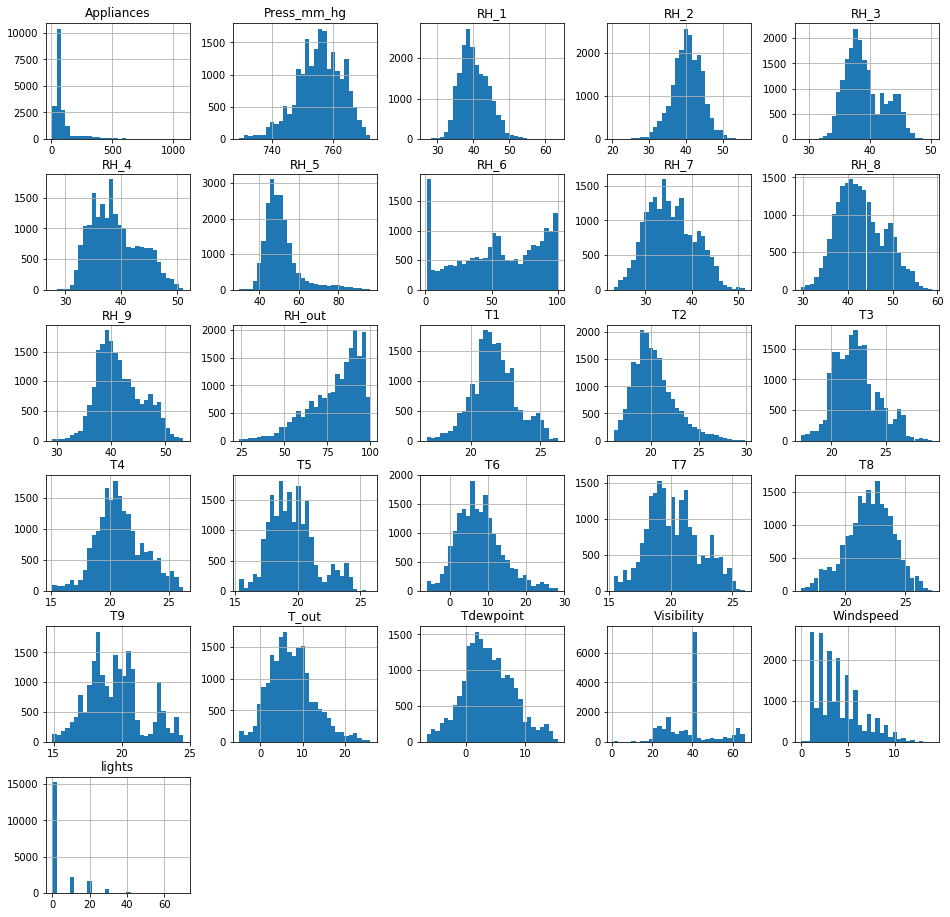

In [5]:
histograms = data.hist(figsize=(16, 16), bins=30)

## Scatterplot

### plotting all the data

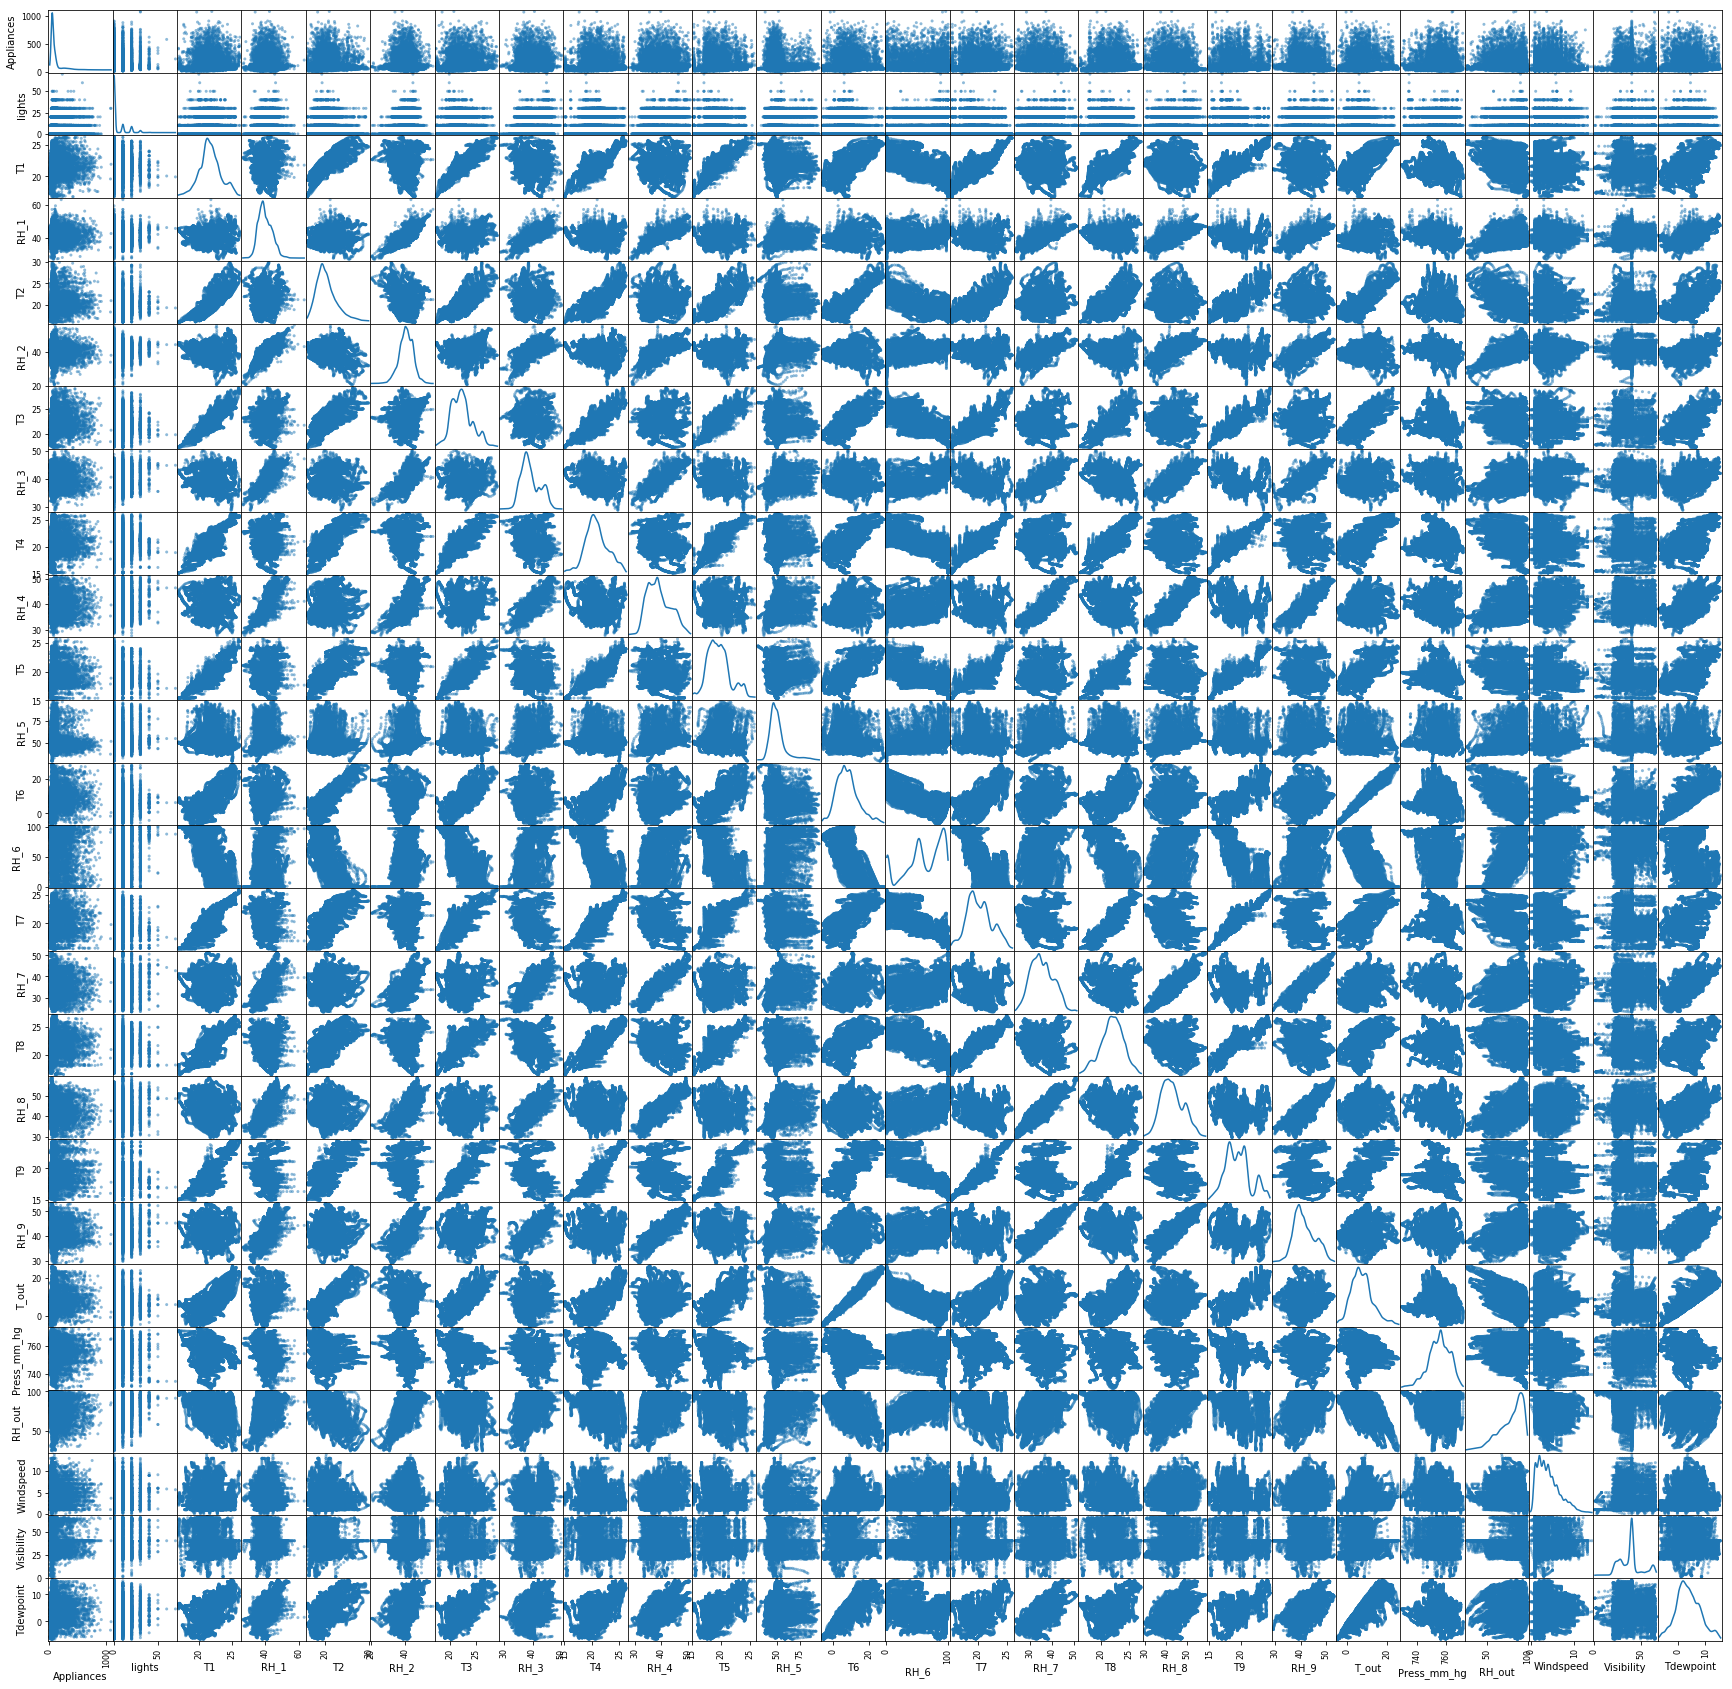

In [6]:
scatter_all = pd.plotting.scatter_matrix(data, diagonal="kde", figsize=(30, 30))


### plotting Temperatures only to be it more readable

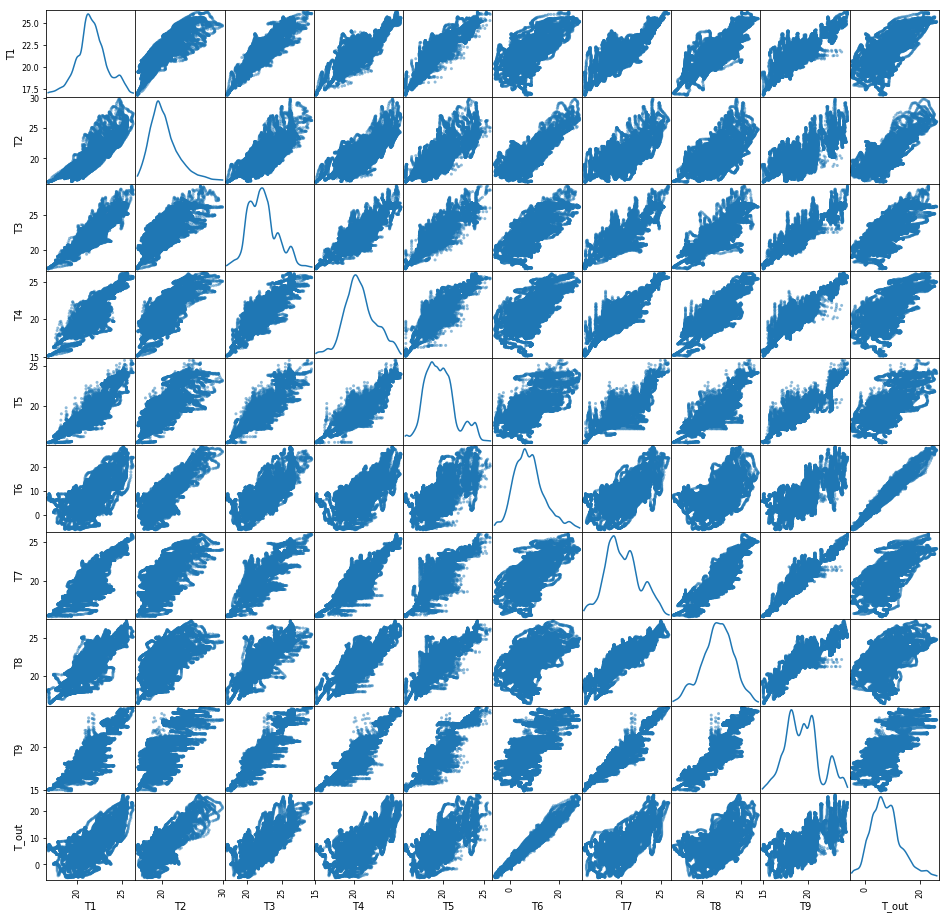

In [8]:
scatter_temp = pd.plotting.scatter_matrix(data[['T1','T2','T3','T4','T5','T6','T7','T8','T9','T_out']],
                                          diagonal="kde", figsize=(16, 16))



i can see linear correlations between T1&T3, T6&T_out ,and T7&T9 

### plotting Humidity Only to be more readable

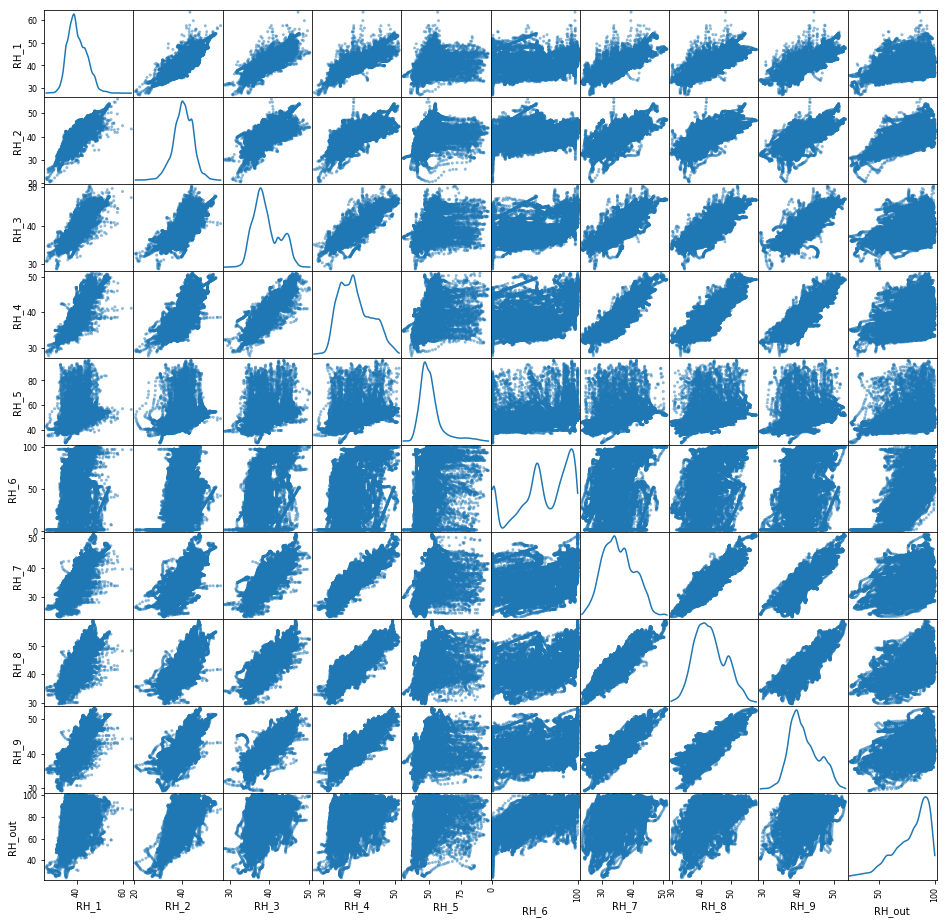

In [9]:
scatter_hum = pd.plotting.scatter_matrix(data[['RH_1','RH_2','RH_3','RH_4','RH_5','RH_6','RH_7','RH_8','RH_9'
                                               ,'RH_out']],
                                          diagonal="kde", figsize=(16, 16))



there's no any linear correlation

### plotting weather paramaters & Appliances(Target Variable)

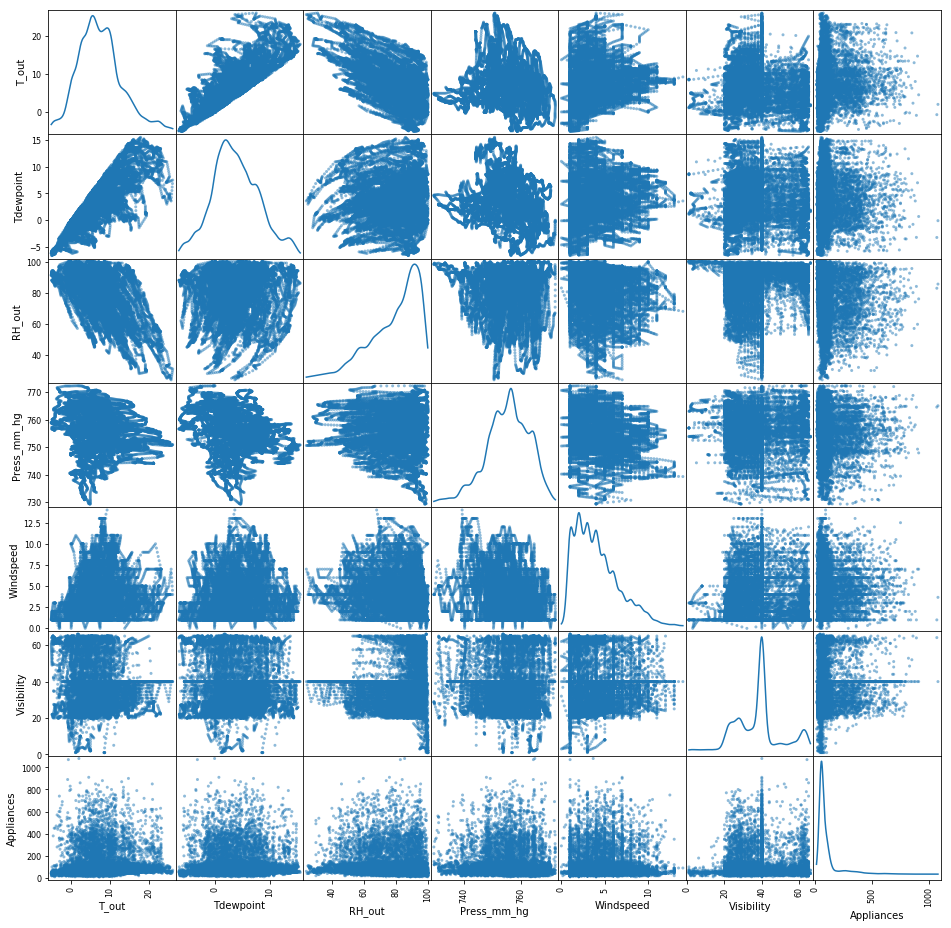

In [10]:
scatter_wea = pd.plotting.scatter_matrix(data[["T_out", "Tdewpoint", "RH_out", "Press_mm_hg", "Windspeed", "Visibility",
                                               'Appliances']],
                                          diagonal="kde", figsize=(16, 16))

there's no any linear correlation

# Data Preprocessing

In [11]:

#Remove Date
data = data.drop('date',axis=1)

In [12]:
from sklearn.cross_validation import train_test_split

#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(data, 
                                                    data['Appliances'], 
                                                    test_size = 0.2, 
                                                    random_state = 18)


/home/mazen/anaconda3/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
#Drop target variable
X_train = X_train.drop("Appliances",axis=1)
X_test = X_test.drop("Appliances",axis=1)

# Benchmark Model

## Gradient Boosting 

In [14]:
from sklearn.ensemble import GradientBoostingRegressor 
from time import time

GBR = GradientBoostingRegressor(random_state=18)

start=time()
GBR.fit(X_train,y_train)
end=time()

GBR_time= end - start

In [15]:
pred = GBR.predict(X_test)

GBR_score_test = GBR.score(X_test,y_test)
GBR_score_train = GBR.score(X_train,y_train)

print("Score on test data is %.4f"%GBR_score_test)
print("Score on train data is %.4f"%GBR_score_train)
print("Elapsed time is %.4f"%GBR_time)

Score on test data is 0.2508
Score on train data is 0.3420
Elapsed time is 1.8748


# Model Selection 

i will try using out those models:
    - Linear Regression
    - Logistic Regression
    - Random Forest Regressor
    - SVM

## Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

start=time()
lin_reg.fit(X_train,y_train)
end=time()

lin_reg_time = end - start

lin_reg_pred = lin_reg.predict(X_train)

lin_reg_score_test = lin_reg.score(X_test,y_test) 
lin_reg_score_train = lin_reg.score(X_train,y_train) 

In [17]:
print("Score on test data is %.4f"%lin_reg_score_test)
print("Score on train data is %.4f"%lin_reg_score_train)
print("Elapsed time is %.4f"%lin_reg_time)

Score on test data is 0.1695
Score on train data is 0.1632
Elapsed time is 0.0094


## Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=18, penalty='l2',C=0.9)

start=time()
LR.fit(X_train,y_train)
end=time()

LR_time = end - start

pred = LR.predict(X_test)

LR_score_test = LR.score(X_test,y_test)
LR_score_train = LR.score(X_train,y_train) 

In [19]:
print("Score on test data is %.4f"%LR_score_test)
print("Score on train data is %.4f"%LR_score_train)
print("Elapsed time is %.4f"%LR_time)

Score on test data is 0.2447
Score on train data is 0.2677
Elapsed time is 35.5616


## Random Forest Regressor

In [20]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(random_state=18)

start=time()
RF.fit(X_train,y_train)
end=time()

RF_time = end - start

pred = RF.predict(X_test)

RF_score_test = RF.score(X_test,y_test)
RF_score_train = RF.score(X_train,y_train) 

In [21]:
print("Score on test data is %.4f"%RF_score_test)
print("Score on train data is %.4f"%RF_score_train)
print("Elapsed time is %.4f"%RF_time)

Score on test data is 0.4950
Score on train data is 0.9133
Elapsed time is 3.0382


## SVM

In [22]:
from sklearn.svm import SVR

SVM = SVR(kernel='linear',C=0.9)

start=time()
SVM.fit(X_train,y_train)
end=time()

SVM_time = end - start

pred = RF.predict(X_test)

SVM_score_test = SVM.score(X_test,y_test)
SVM_score_train = SVM.score(X_train,y_train) 

In [23]:
print("Score on test data is %.4f"%SVM_score_test)
print("Score on train data is %.4f"%SVM_score_train)
print("Elapsed time is %.4f"%SVM_time)

Score on test data is 0.0548
Score on train data is 0.0278
Elapsed time is 39.3045


## Visualize the Scores and Time Elapsed

### Time

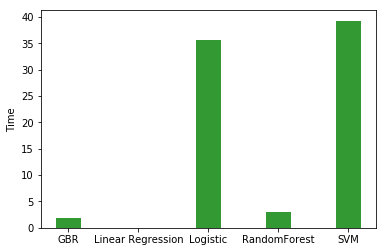

In [24]:
models_name=('GBR','Linear Regression','Logistic','RandomForest','SVM')
index = np.arange(5)
width_bar = 0.35
op = 0.8

plt.bar(models_name
        ,[GBR_time,lin_reg_time,LR_time,RF_time,SVM_time],width_bar,align='center',color='g',alpha=op)

plt.ylabel('Time')
#plt.xticks(index ,models_name)
plt.show()

### R2 Score

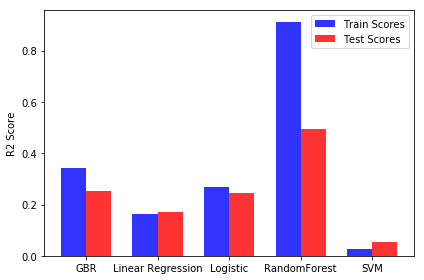

In [25]:
#score on train bars
train_bars = plt.bar(index,
                    [GBR_score_train,lin_reg_score_train,LR_score_train,RF_score_train,SVM_score_train],width_bar,
                    color='b',alpha=op, label="Train Scores")

#score on test bars
test_bars = plt.bar(index+width_bar,
                    [GBR_score_test,lin_reg_score_test,LR_score_test,RF_score_test,SVM_score_test],width_bar,
                    color='r',alpha=op, label="Test Scores")

plt.ylabel("R2 Score")
plt.xticks(index +(width_bar/2),models_name)
plt.legend()
plt.tight_layout()
plt.show()

it seems the RandomForest is the best in time & score among those model

# Optimization

i'm going to tune the RandomForest model

In [35]:
# using GridSearch to finding the best parameters
from sklearn.model_selection import GridSearchCV

#paramete to be tuned
parameter = {
    "n_estimators": [10, 50, 100, 150, 300,400],
    "max_features": ["auto", "sqrt", "log2"],
    "max_depth": [None, 10, 50, 100,200,300, 500]
}


grid = GridSearchCV(RF,parameter,scoring='r2') 

grid.fit(X_train,y_train)

opt_RF = grid.best_estimator_

opt_RF_pred = opt_RF.predict(X_test)

In [36]:
print("Score on test data is %.4f"%opt_RF.score(X_test,y_test))
print("Score on train data is %.4f"%opt_RF.score(X_train,y_train))

Score on test data is 0.5861
Score on train data is 0.9434


In [37]:
#Display best parameters
print(grid.best_params_)

{'max_features': 'log2', 'n_estimators': 400, 'max_depth': 50}


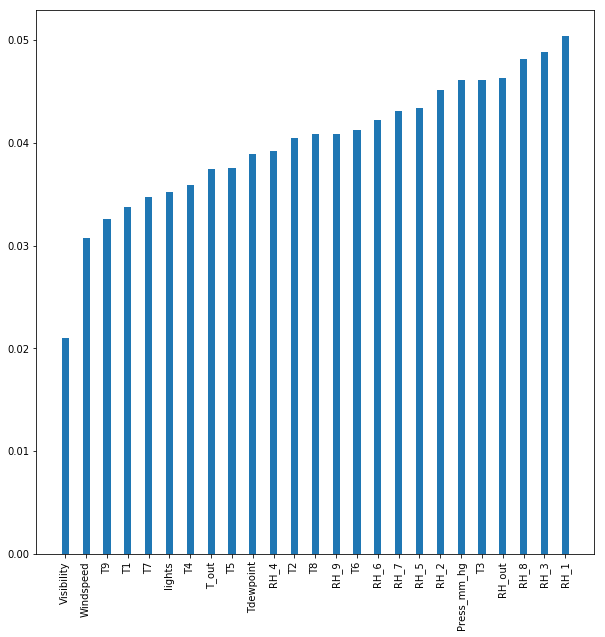

In [38]:
#plot the feature importances
feat_imp = np.argsort(opt_RF.feature_importances_)

names = tuple(X_train.columns[feat_imp]) #name of features

plt.figure(figsize=(10,10))

plt.bar(np.arange(len(feat_imp))
        ,np.sort(opt_RF.feature_importances_),width_bar)

plt.xticks(np.arange(len(feat_imp)), names,rotation='vertical')
plt.show()

# Conclusion

   - Random Forest Regression after tuning could repersent 58.66% of the data on testing data and 94.34% on training data.